In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
from rasterio import plot

In [ ]:
pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 59.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 16.7 MB 444 kB/s 
     |████████████████████████████████| 6.3 MB 31.4 MB/s 


In [ ]:
ds2 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/BARMAR_BAND_2.tif")
ds1 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/barmar_band_1.tif")
ds3 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/barmar_band_3.tif")
ds4 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/barmar_band_4.tif")
ds5 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/barmar_band_5.tif")
ds6 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/barmar_band_6.tif")
ds7 = rasterio.open("/content/drive/MyDrive/MSC DS /4th Semester/THAR_APRIL_2022/All_band_tiff_file/barmar_band_7.tif")

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
ds4.height

891

In [ ]:
ds4.width

1673

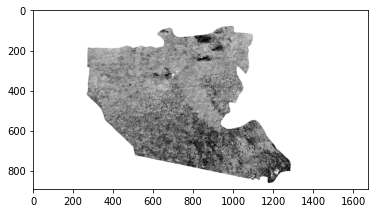

In [ ]:
plot.show(ds4)

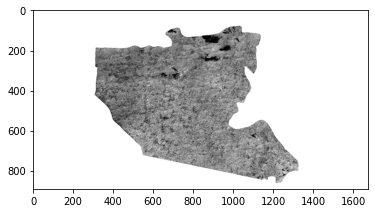

In [ ]:
plot.show(ds5)

In [ ]:
ds4.dtypes[0]

'uint8'

In [ ]:
ds4.crs

In [ ]:
ds4.transform

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

In [ ]:
ds4.read(1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

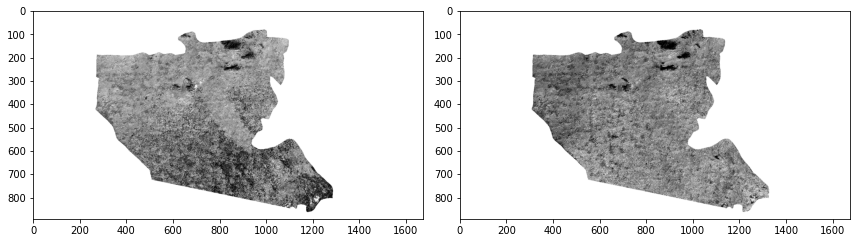

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ds4, ax=ax1, cmap='Blues') #red
plot.show(ds5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [ ]:
red = ds4.read(1).astype('float64')
nir = ds5.read(1).astype('float64')

In [ ]:
red

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [ ]:
nir

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [ ]:
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:

ndvi=np.where((nir+red)==0., 0, (nir-red)/(nir+red))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
ndvi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ndvi.shape

(891, 1673)

In [ ]:

#ndvi = es.normalized_diff(arr_st[4], arr_st[3])

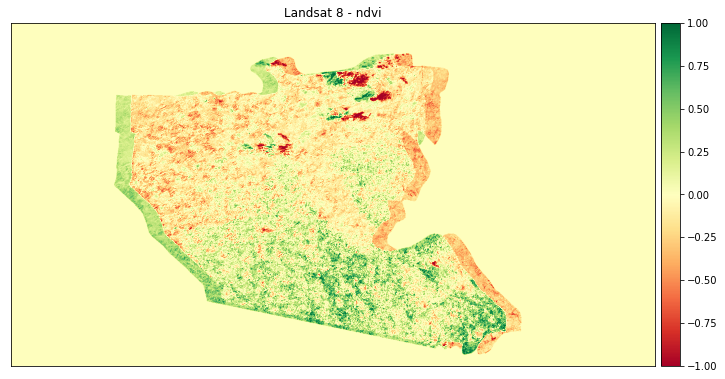

In [ ]:
titles = ["Landsat 8 - ndvi"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

In [ ]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, 3, 4, 5],
             mask=False,
       fill_value=999999)

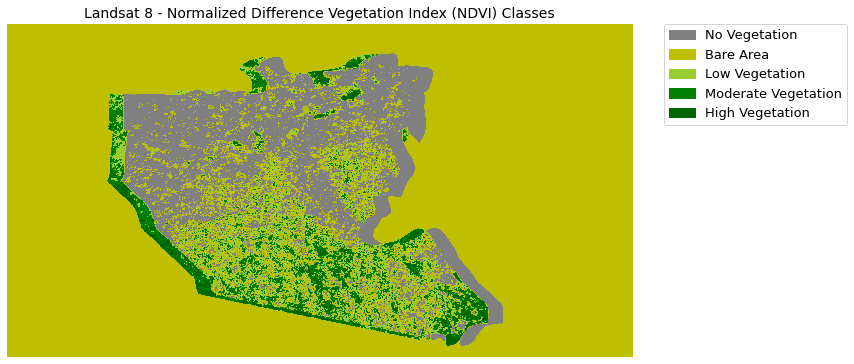

In [ ]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
plt.tight_layout()

In [ ]:
wow=ndvi_landsat_class.tolist()

In [ ]:
(unique, counts) = np.unique(wow, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[      1,  270184],
       [      2, 1038630],
       [      3,   67564],
       [      4,   43778],
       [      5,   70487]])

In [ ]:
No_Vegetation=frequencies[0][1]/(frequencies[0][1]+frequencies[1][1]+frequencies[2][1]+frequencies[3][1]+frequencies[4][1])*100
No_Vegetation

18.12533249074393

In [ ]:
Bare_Area=frequencies[1][1]/(frequencies[0][1]+frequencies[1][1]+frequencies[2][1]+frequencies[3][1]+frequencies[4][1])*100
Bare_Area

69.67664289840022

In [ ]:
Low_Vegetation=frequencies[2][1]/(frequencies[0][1]+frequencies[1][1]+frequencies[2][1]+frequencies[3][1]+frequencies[4][1])*100
Low_Vegetation

4.532540655274268

In [ ]:
Moderate_Vegetation=frequencies[3][1]/(frequencies[0][1]+frequencies[1][1]+frequencies[2][1]+frequencies[3][1]+frequencies[4][1])*100
Moderate_Vegetation

2.936853424998474

In [ ]:
High_Vegetation=frequencies[4][1]/(frequencies[0][1]+frequencies[1][1]+frequencies[2][1]+frequencies[3][1]+frequencies[4][1])*100
High_Vegetation

4.728630530583111

In [ ]:
import pandas as pd  
df=pd.DataFrame( columns= ["No_Vegetation","Bare_Area","Low_Vegetation","Moderate_Vegetation","High_Vegetation"])


In [ ]:
#list_per=[No_Vegetation,Bare_Area,Low_Vegetation,Moderate_Vegetation,High_Vegetation]
#df[(df.index)] = list_per

In [ ]:
list_per=[No_Vegetation,Bare_Area,Low_Vegetation,Moderate_Vegetation,High_Vegetation]
df.loc[len(df.index)] = list_per

In [ ]:
df

,No_Vegetation,Bare_Area,Low_Vegetation,Moderate_Vegetation,High_Vegetation
0,18.125332,69.676643,4.532541,2.936853,4.728631
